In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from os import listdir
from os.path import isfile, join

from sklearn.metrics import cohen_kappa_score

sns.set_theme()

In [2]:
path_annotations = '/content/drive/MyDrive/DS4All_Cohort6_Team_172/Annotations/'
path_original_annotations = '/content/drive/MyDrive/DS4All_Cohort6_Team_172/Code/data/ANH_RAIN_DATASET/audio_labels.csv'  # manual annotations in csv table


In [3]:
onlyfiles = [f for f in listdir(path_annotations) if isfile(join(path_annotations, f))]
onlyfiles

['JL Annotation Template.xlsx',
 'SQA Annotation Template.xlsx',
 'Annotation Template.xlsx',
 'OMC Annotation Template.xlsx',
 'CFC Annotation Template.xlsx',
 'SAP Annotation Tamplate.xlsx',
 'MAR Annotation Template.xlsx',
 'JSC Annotation Template.xlsx']

In [4]:
df_all_annotations = pd.DataFrame()

for file_name in onlyfiles:
  df = pd.read_excel(path_annotations+file_name)
  print(df.shape)
  df['origin'] = file_name.split()[0]
  df_all_annotations = df_all_annotations.append(df,ignore_index=True)

(211, 21)
(1104, 21)
(1104, 21)
(214, 21)
(1104, 21)
(211, 21)
(1104, 21)
(1104, 21)


In [5]:
df_all_annotations.columns

Index(['name', 'Biofonía', 'Mamíferos', 'Aves', 'Murciélagos', 'Insectos',
       'Herpetos (Anfibios)', 'Geofonía', 'Flujo de agua', 'Lluvia', 'Viento',
       'Truenos', 'Antropofonía ', 'Transporte Motorizado', 'Construcción',
       'Animales Domésticos', 'Voces humanos', 'Señal saturada',
       'Pulsos / Interferencia', 'Indeterminado', 'Descripción / Comentarios',
       'origin', 'Pulsos', 'Antropofonía'],
      dtype='object')

In [6]:
labels_list = ['Biofonía', 'Mamíferos', 'Aves', 'Murciélagos', 'Insectos',
                'Herpetos (Anfibios)', 'Geofonía', 'Flujo de agua', 'Lluvia', 'Viento',
                'Truenos', 'Antropofonía ', 'Transporte Motorizado', 'Construcción',
                'Animales Domésticos', 'Voces humanos', 'Señal saturada',
                'Pulsos / Interferencia', 'Indeterminado', 
                'Pulsos', 'Antropofonía']

print(df_all_annotations.shape)
df_all_annotations = df_all_annotations.dropna(subset=labels_list,how='all').reset_index(drop=True)
print(df_all_annotations.shape)


(6156, 24)
(1433, 24)


In [7]:
df_all_annotations.head()

,name,Biofonía,Mamíferos,Aves,Murciélagos,Insectos,Herpetos (Anfibios),Geofonía,Flujo de agua,Lluvia,...,Construcción,Animales Domésticos,Voces humanos,Señal saturada,Pulsos / Interferencia,Indeterminado,Descripción / Comentarios,origin,Pulsos,Antropofonía
0,0161.wav,1.0,NaN,1.0,NaN,2.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JL,NaN,NaN
1,0162.wav,1.0,NaN,1.0,NaN,2.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,JL,NaN,NaN
2,0163.wav,1.0,NaN,1.0,NaN,2.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,JL,NaN,NaN
3,0164.wav,1.0,NaN,NaN,NaN,2.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JL,NaN,NaN
4,0165.wav,1.0,NaN,NaN,NaN,2.0,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JL,NaN,NaN


In [8]:
df_all_annotations['name'].value_counts().value_counts()

1    795
2    289
3     20
Name: name, dtype: int64

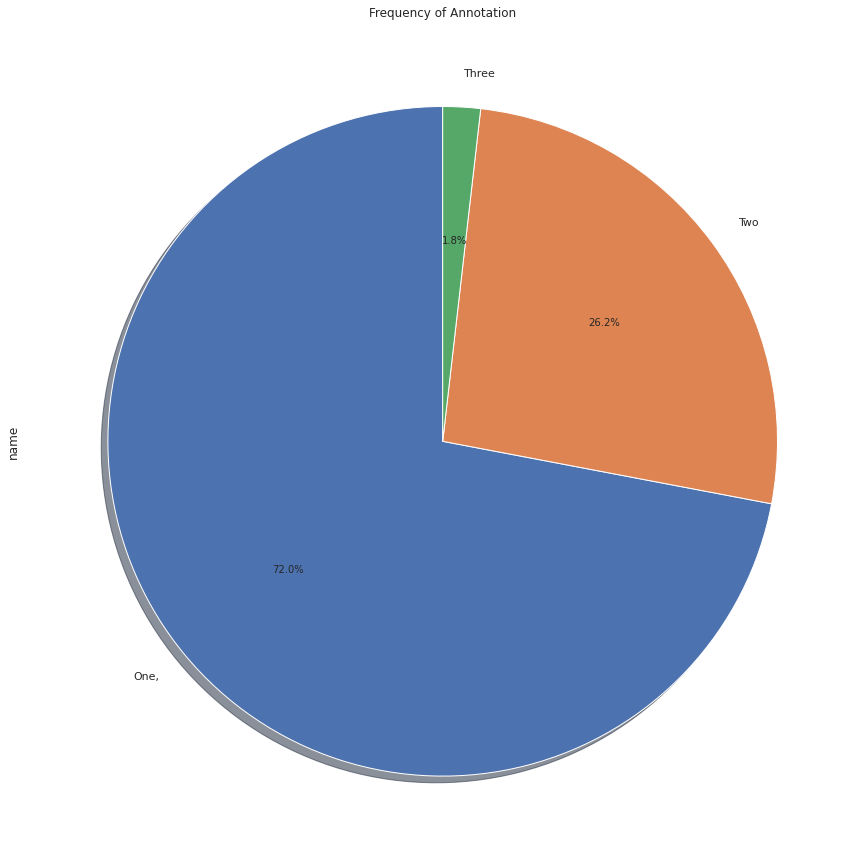

In [9]:
plt.figure(figsize=(15, 30))
df_all_annotations['name'].value_counts().value_counts().plot.pie(labels=['One,','Two','Three'], 
                                                                  autopct='%1.1f%%',
                                                                  shadow=True, 
                                                                  startangle=90)

plt.title('Frequency of Annotation')
plt.show()                                                                 

In [10]:
current_labels = set(df_all_annotations['name'].apply(lambda x: int(x.split('.')[0])))
all_labels = set(range(1104))
to_annotate = all_labels - current_labels
to_annotate

set()

In [11]:
# auto complete_biofonia, geo_fonia, antropofonia

In [12]:
labels_list = [ 'Mamíferos', 'Aves', 'Murciélagos', 'Insectos',
                'Herpetos (Anfibios)', 'Flujo de agua', 'Lluvia', 'Viento',
                'Truenos', 'Antropofonía ', 'Transporte Motorizado', 'Construcción',
                'Animales Domésticos', 'Voces humanos', 'Señal saturada',
                'Pulsos / Interferencia', 'Indeterminado', 
                'Pulsos',]
df_all_annotations_sum = df_all_annotations.groupby(['name'])[labels_list].sum().reset_index()

In [13]:
df_all_annotations_sum = pd.melt(df_all_annotations_sum, id_vars=['name'],
                                 value_vars=labels_list).sort_values(by=['value']).drop_duplicates(subset=['name'],keep='last')

In [14]:
df_all_annotations_sum

# plot 

,name,variable,value
6118,0598.wav,Flujo de agua,0.0
3863,0551.wav,Insectos,1.0
3862,0550.wav,Insectos,1.0
3852,0540.wav,Insectos,1.0
3851,0539.wav,Insectos,1.0
...,...,...,...
11246,0206.wav,Transporte Motorizado,5.0
11248,0208.wav,Transporte Motorizado,5.0
3313,0001.wav,Insectos,5.0
3312,0000.wav,Insectos,5.0


In [15]:
df_all_annotations_sum['variable'].unique()

array(['Flujo de agua', 'Insectos', 'Lluvia', 'Herpetos (Anfibios)',
       'Transporte Motorizado', 'Señal saturada', 'Aves', 'Truenos',
       'Antropofonía ', 'Indeterminado', 'Viento', 'Construcción',
       'Pulsos', 'Mamíferos', 'Voces humanos'], dtype=object)

In [16]:
df_original = pd.read_csv(path_original_annotations)
df_original = df_original[['sample_idx','label']]
df_original.shape

(1104, 2)

In [17]:
column_dict = {'SENSAT':'Señal saturada',
                'MURCIE':'Murciélagos',
                'INSECT':'Insectos', 
                'LLUVIA':'Lluvia', 
                'PULSOS':'Pulsos', 
                'HERPET': 'Herpetos (Anfibios)',
                'ANTROP':'Transporte Motorizado',
                'AVEVOC':'Aves', 
                'TRAMOT': 'Transporte Motorizado', 
                'INDETE': 'Indeterminado', 
                'PASOS':'Transporte Motorizado', 
                'FLUAGU':'Flujo de agua',
                'ANIDOM': 'Animales Domésticos'
              }
df_original['label'] = df_original['label'].replace(column_dict)

In [18]:
df_original['label'].unique()

array(['Señal saturada', 'Murciélagos', 'Insectos', 'Lluvia', 'Pulsos',
       'Herpetos (Anfibios)', 'Transporte Motorizado', 'Aves',
       'Indeterminado', 'Flujo de agua', 'Animales Domésticos'],
      dtype=object)

In [19]:
df_all_annotations_sum = df_all_annotations_sum[['name','variable']]
df_all_annotations_sum.columns = ['sample_idx','label']


In [20]:
df_original['Type'] = 'Expert'
df_all_annotations_sum['Type'] = 'Amateur'
both_annotations_append = df_original.append(df_all_annotations_sum)

In [21]:
df_original

,sample_idx,label,Type
0,0000.wav,Señal saturada,Expert
1,0001.wav,Murciélagos,Expert
2,0002.wav,Insectos,Expert
3,0003.wav,Murciélagos,Expert
4,0004.wav,Señal saturada,Expert
...,...,...,...
1099,1099.wav,Aves,Expert
1100,1100.wav,Transporte Motorizado,Expert
1101,1101.wav,Lluvia,Expert
1102,1102.wav,Aves,Expert


In [22]:
both_annotations_append

,sample_idx,label,Type
0,0000.wav,Señal saturada,Expert
1,0001.wav,Murciélagos,Expert
2,0002.wav,Insectos,Expert
3,0003.wav,Murciélagos,Expert
4,0004.wav,Señal saturada,Expert
...,...,...,...
11246,0206.wav,Transporte Motorizado,Amateur
11248,0208.wav,Transporte Motorizado,Amateur
3313,0001.wav,Insectos,Amateur
3312,0000.wav,Insectos,Amateur


<Figure size 1080x2160 with 0 Axes>

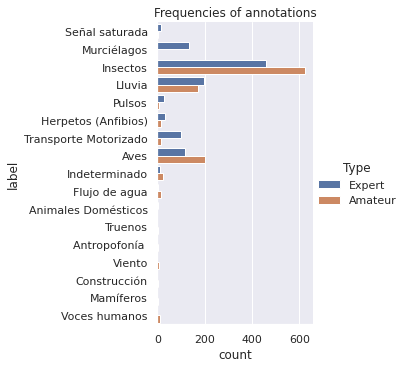

In [23]:
plt.figure(figsize=(15, 30))
sns.catplot(y="label", hue="Type", kind="count", data=both_annotations_append)
plt.title('Frequencies of annotations')
plt.show()

In [24]:
df_all_annotations_sum = df_all_annotations_sum[df_all_annotations_sum.columns[:2]]
df_all_annotations_sum.columns = ['sample_idx','label_amateur']
both_annotations = pd.merge(df_original,df_all_annotations_sum,on='sample_idx',how='left')
both_annotations.head()

,sample_idx,label,Type,label_amateur
0,0000.wav,Señal saturada,Expert,Insectos
1,0001.wav,Murciélagos,Expert,Insectos
2,0002.wav,Insectos,Expert,Insectos
3,0003.wav,Murciélagos,Expert,Insectos
4,0004.wav,Señal saturada,Expert,Insectos


In [25]:
cohen_kappa_score(both_annotations['label'],both_annotations['label_amateur'])

0.35590966252648626

In [26]:
for label_name in both_annotations['label'].unique():
    both_annotations_ = both_annotations[both_annotations['label']==label_name]
    print(both_annotations_.shape)
    
    print(cohen_kappa_score(both_annotations_['label'],both_annotations_['label_amateur']))

(17, 4)
0.0
(135, 4)
0.0
(461, 4)
0.0
(196, 4)
0.0
(29, 4)
0.0
(33, 4)
0.0
(101, 4)
0.0
(117, 4)
0.0
(10, 4)
0.0
(4, 4)
0.0
(1, 4)
0.0


In [27]:
both_annotations_

,sample_idx,label,Type,label_amateur
941,0941.wav,Animales Domésticos,Expert,Insectos
